# Plots with confidence interval

In [19]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval


parameters = json.load(open("parameters.json"))

max_bellman_iterations = 2
max_bellman_iterations_validation = max_bellman_iterations + 20
seeds = range(21, 41)
n_states = parameters["n_states"]
n_actions = 2
n_weights = parameters["n_weights"]
n_repetitions = parameters["n_repetitions"]
ticks_freqs = {"2": 2, "5": 5, "15":5}
ticks_freq = ticks_freqs[str(max_bellman_iterations)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General case

### Extract data

In [20]:
fqi_q = np.zeros((len(seeds), max_bellman_iterations + 1, n_states, n_actions))
fqi_bi = np.zeros((len(seeds), max_bellman_iterations + 1, n_states, n_actions))
fqi_v = np.zeros((len(seeds), max_bellman_iterations + 1, n_states))

for idx_seed, seed in enumerate(seeds):
    fqi_q[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_Q_{seed}.npy")
    fqi_bi[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_BI_{seed}.npy")
    fqi_v[idx_seed] = np.load(f"figures/data/FQI/{max_bellman_iterations}_V_{seed}.npy")

lspi_q = np.load(f"figures/data/LSPI/{max_bellman_iterations}_Q.npy")
lspi_bi = np.load(f"figures/data/LSPI/{max_bellman_iterations}_BI.npy")
lspi_v = np.load(f"figures/data/LSPI/{max_bellman_iterations}_V.npy")

optimal_q = np.load(f"figures/data/optimal/Q.npy")
optimal_v = np.load(f"figures/data/optimal/V.npy")

pbo_linear_q = np.zeros((len(seeds), max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_bi = np.zeros((len(seeds), max_bellman_iterations_validation + 2, n_states, n_actions))
pbo_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 2, n_states))

for idx_seed, seed in enumerate(seeds):
    pbo_linear_q[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_Q_{n_weights}_{seed}.npy")
    pbo_linear_bi[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_BI_{n_weights}_{seed}.npy")
    pbo_linear_v[idx_seed] = np.load(f"figures/data/PBO_linear/{max_bellman_iterations}_V_{n_weights}_{seed}.npy")

pbo_max_linear_q = np.zeros((len(seeds), max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_bi = np.zeros((len(seeds), max_bellman_iterations_validation + 1, n_states, n_actions))
pbo_max_linear_v = np.zeros((len(seeds), max_bellman_iterations_validation + 1, n_states))

for idx_seed, seed in enumerate(seeds):
    pbo_max_linear_q[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_Q_{n_repetitions}_{seed}.npy")
    pbo_max_linear_bi[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_BI_{n_repetitions}_{seed}.npy")
    pbo_max_linear_v[idx_seed] = np.load(f"figures/data/PBO_max_linear/{max_bellman_iterations}_V_{n_repetitions}_{seed}.npy")

pbo_optimal_q = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_Q.npy")
pbo_optimal_bi = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_BI.npy")
pbo_optimal_v = np.load(f"figures/data/PBO_optimal/{max_bellman_iterations}_V.npy")

### Distances with the optimal Q function

In [21]:
fqi_q_mean = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).mean(axis=0)
fqi_q_std = np.sqrt(np.mean(np.square(fqi_q - optimal_q), axis=(2, 3))).std(axis=0)
fqi_q_confidence_interval = confidence_interval(fqi_q_mean, fqi_q_std, len(seeds))

lspi_q_mean = np.sqrt(np.mean(np.square(lspi_q - optimal_q), axis=(1, 2)))

pbo_linear_q_mean = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
pbo_linear_q_std = np.sqrt(np.mean(np.square(pbo_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
pbo_linear_q_confidence_interval = confidence_interval(pbo_linear_q_mean, pbo_linear_q_std, len(seeds))

pbo_max_linear_q_mean = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).mean(axis=0)
pbo_max_linear_q_std = np.sqrt(np.mean(np.square(pbo_max_linear_q - optimal_q), axis=(2, 3))).std(axis=0)
pbo_max_linear_q_confidence_interval = confidence_interval(pbo_max_linear_q_mean, pbo_max_linear_q_std, len(seeds))

pbo_optimal_q_mean = np.sqrt(np.mean(np.square(pbo_optimal_q - optimal_q), axis=(1, 2)))

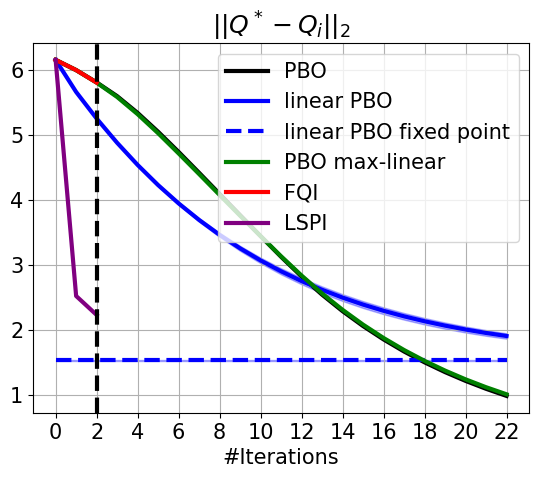

In [22]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_q_mean, label="PBO", color="black")

plt.plot(iterations_validation, pbo_linear_q_mean[:-1], label="linear PBO", color="blue")
plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, :-1], pbo_linear_q_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point")
plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_q_mean, label="PBO max-linear", color="green")
plt.fill_between(iterations_validation, pbo_max_linear_q_confidence_interval[0], pbo_max_linear_q_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_q_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_q_confidence_interval[0], fqi_q_confidence_interval[1], color="red", alpha=0.3)

plt.plot(iterations, lspi_q_mean, label="LSPI", color="purple")

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")

plt.title(r"$|| Q^* - Q_i ||_2$")
plt.legend()
plt.grid(zorder=0)
_ = plt.savefig(f"figures/distance_to_optimal_Q_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distances with the optimal V function

In [23]:
fqi_v_mean = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).mean(axis=0)
fqi_v_std = np.sqrt(np.mean(np.square(fqi_v - optimal_v), axis=2)).std(axis=0)
fqi_v_confidence_interval = confidence_interval(fqi_v_mean, fqi_v_std, len(seeds))

lspi_v_mean = np.sqrt(np.mean(np.square(lspi_v - optimal_v), axis=1))

pbo_linear_v_mean = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).mean(axis=0)
pbo_linear_v_std = np.sqrt(np.mean(np.square(pbo_linear_v - optimal_v), axis=2)).std(axis=0)
pbo_linear_v_confidence_interval = confidence_interval(pbo_linear_v_mean, pbo_linear_v_std, len(seeds))

pbo_max_linear_v_mean = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).mean(axis=0)
pbo_max_linear_v_std = np.sqrt(np.mean(np.square(pbo_max_linear_v - optimal_v), axis=2)).std(axis=0)
pbo_max_linear_v_confidence_interval = confidence_interval(pbo_max_linear_v_mean, pbo_max_linear_v_std, len(seeds))

pbo_optimal_v_mean = np.sqrt(np.mean(np.square(pbo_optimal_v - optimal_v), axis=1))

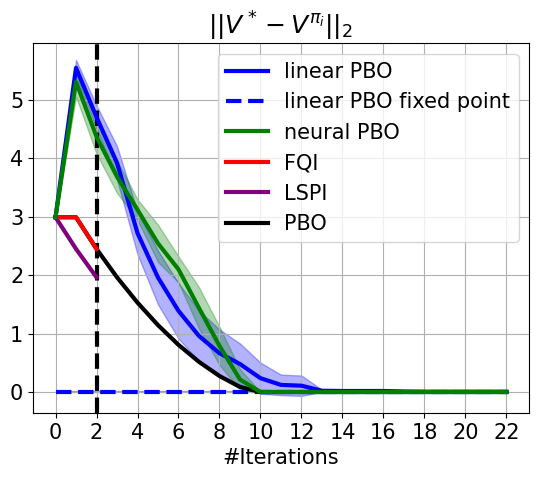

In [24]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_linear_v_mean[:-1], label="linear PBO", color="blue", zorder=7)
plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, :-1], pbo_linear_v_confidence_interval[1, :-1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_v_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
plt.fill_between(iterations_validation, pbo_linear_v_confidence_interval[0, -1], pbo_linear_v_confidence_interval[1, -1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_v_mean, label="neural PBO", color="green", zorder=8)
plt.fill_between(iterations_validation, pbo_max_linear_v_confidence_interval[0], pbo_max_linear_v_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_v_mean, label="FQI", color="red", zorder=6)
plt.fill_between(iterations, fqi_v_confidence_interval[0], fqi_v_confidence_interval[1], color="red", alpha=0.3)

plt.plot(iterations, lspi_v_mean, label="LSPI", color="purple", zorder=5)

plt.plot(iterations_validation, pbo_optimal_v_mean, label="PBO", color="black", zorder=4)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")

plt.title(r"$ || V^* - V^{\pi_i} ||_2 $")
plt.legend()
plt.grid(zorder=0)
_ = plt.savefig(f"figures/distance_to_optimal_V_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Distance to the optimal Bellman iteration

In [25]:
fqi_bi_mean = np.sqrt(np.mean(np.square(fqi_bi[:, :-1] - fqi_q[:, 1:]), axis=(2, 3))).mean(axis=0)
fqi_bi_std = np.sqrt(np.mean(np.square(fqi_bi[:, :-1] - fqi_q[:, 1:]), axis=(2, 3))).std(axis=0)
fqi_bi_confidence_interval = confidence_interval(fqi_bi_mean, fqi_bi_std, len(seeds))

lspi_bi_mean = np.sqrt(np.mean(np.square(lspi_bi[:-1] - lspi_q[1:]), axis=(1, 2)))

pbo_linear_bi_mean = np.sqrt(np.mean(np.square(pbo_linear_bi[:, :-2] - pbo_linear_q[:, 1:-1]), axis=(2, 3))).mean(axis=0)
pbo_linear_bi_std = np.sqrt(np.mean(np.square(pbo_linear_bi[:, :-2] - pbo_linear_q[:, 1:-1]), axis=(2, 3))).std(axis=0)
pbo_linear_bi_confidence_interval = confidence_interval(pbo_linear_bi_mean, pbo_linear_bi_std, len(seeds))

pbo_linear_bi_fixed_point_mean = np.sqrt(np.mean(np.square(pbo_linear_bi[:, -1] - pbo_linear_q[:, -1]), axis=(1, 2))).mean(axis=0)
pbo_linear_bi_fixed_point_std = np.sqrt(np.mean(np.square(pbo_linear_bi[:, -1] - pbo_linear_q[:, -1]), axis=(1, 2))).std(axis=0)
pbo_linear_bi_fixed_point_confidence_interval = confidence_interval([pbo_linear_bi_fixed_point_mean], [pbo_linear_bi_fixed_point_std], len(seeds))

pbo_max_linear_bi_mean = np.sqrt(np.mean(np.square(pbo_max_linear_bi[:, :-1] - pbo_max_linear_q[:, 1:]), axis=(2, 3))).mean(axis=0)
pbo_max_linear_bi_std = np.sqrt(np.mean(np.square(pbo_max_linear_bi[:, :-1] - pbo_max_linear_q[:, 1:]), axis=(2, 3))).std(axis=0)
pbo_max_linear_bi_confidence_interval = confidence_interval(pbo_max_linear_bi_mean, pbo_max_linear_bi_std, len(seeds))

pbo_optimal_bi_mean = np.sqrt(np.mean(np.square(pbo_optimal_bi[:-1] - pbo_optimal_q[1:]), axis=(1, 2)))

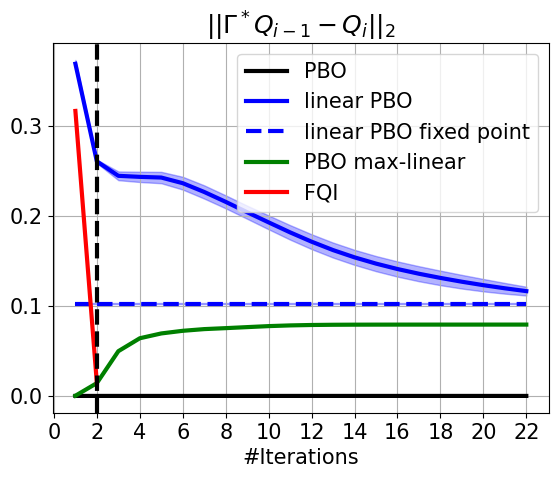

In [26]:
import matplotlib.pyplot as plt 

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(1, max_bellman_iterations + 1)
iterations_validation = range(1, max_bellman_iterations_validation + 1)

plt.plot(iterations_validation, pbo_optimal_bi_mean, label="PBO", color="black")

plt.plot(iterations_validation, pbo_linear_bi_mean, label="linear PBO", color="blue")
plt.fill_between(iterations_validation, pbo_linear_bi_confidence_interval[0], pbo_linear_bi_confidence_interval[1], color="blue", alpha=0.3)

plt.hlines(pbo_linear_bi_fixed_point_mean, 1, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point")
plt.fill_between(iterations_validation, pbo_linear_bi_fixed_point_confidence_interval[0], pbo_linear_bi_fixed_point_confidence_interval[1], color="blue", alpha=0.3)

plt.plot(iterations_validation, pbo_max_linear_bi_mean, label="PBO max-linear", color="green")
plt.fill_between(iterations_validation, pbo_max_linear_bi_confidence_interval[0], pbo_max_linear_bi_confidence_interval[1], color="green", alpha=0.3)

plt.plot(iterations, fqi_bi_mean, label="FQI", color="red")
plt.fill_between(iterations, fqi_bi_confidence_interval[0], fqi_bi_confidence_interval[1], color="red", alpha=0.3)

# plt.plot(iterations, lspi_bi_mean, label="LSPI", color="purple")

plt.axvline(max_bellman_iterations, color="black", linestyle="--")
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")

plt.title(r"$|| \Gamma^*Q_{i-1} - Q_i ||_2$")
plt.legend()
plt.grid(zorder=0)
_ = plt.savefig(f"figures/distance_to_optimal_BI_{max_bellman_iterations}.pdf", bbox_inches='tight')